<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/classifcaion_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

classifcaion -> binary classificaion , multiclass classficaion

* architecture

* inputs shapes and output shape

* steps in modeling

* defferent classificaion evaluation model

* saving and loading models


In [1]:
from sklearn.datasets import make_circles
# make 1000 samples
n_samples = 1000
# create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [2]:
# make a dataframe
import pandas as pd
circles = pd.DataFrame({'X0':X_train[:,0], 'X1':X_train[:,1], 'label':y_train})
circles.head()

,X0,X1,label
0,0.339489,-0.736725,1
1,-0.314000,0.942543,0
2,-0.506802,-0.643682,1
3,-0.876364,0.484181,0
4,0.745142,-0.715244,0


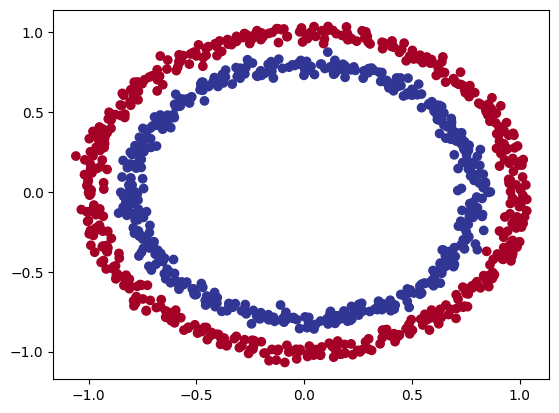

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [5]:
# check the shapes of our feature and labels
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# view teh first examle of feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## stes in modelling
teh stpes in modelling with tensorflow are typically .
1. create or import a model
2. compile a model
3. fit the model
4. evaluate the mode
5. tweak
6. evaluate...

In [12]:
from os import access
# set the random seed
import tensorflow as tf
tf.random.set_seed(42)
# createa the model using sequentail API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,verbose=0)# i like to set verbose to 0 so as to reduce the output
model.evaluate(X_test,y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4992 - loss: 0.6919  


[0.6932789087295532, 0.5]

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

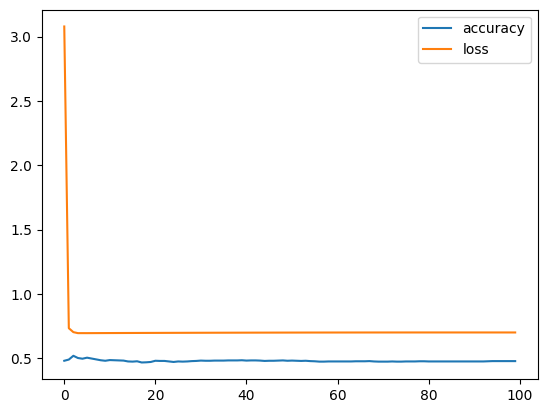

In [14]:
# draw the history of the loss
pd.DataFrame(history.history).plot()
plt.show()

In [15]:
model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[0.47360945],
       [0.49625143],
       [0.47345784],
       [0.4743696 ],
       [0.5036265 ]], dtype=float32)

To visualize our model  predictions lest create a function



In [18]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the dicision boundary created by a model predicting on X
  """
  # define the axis boundaries of the plot and create a meshgrid
  X_min,X_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1,X[:,1].max() + 0.1
  # Changed np.linespace to np.linspace
  XX,yy = np.meshgrid(np.linspace(X_min,X_max,100),
                      np.linspace(y_min,y_max,100))
  # create  X values ( were going to make prediction on these)
  X_in = np.c_[XX.ravel(),yy.ravel()]
  # make predictions
  y_pred = model.predict(X_in)
  # check for mulit-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classificaion")
    y_pred = np.argmax(y_pred,axis=1).reshape(XX.shape)
  else:
    print("doing binary classificaion")
    y_pred = np.round(y_pred).reshape(XX.shape)
  # plot the decision boundary
  plt.contourf(XX,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdBu)
  plt.xlim(XX.min(),XX.max())
  plt.ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classificaion


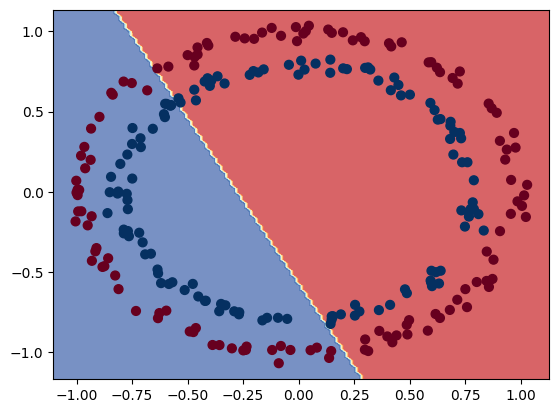

In [19]:
# checkout the prediction our model is making
plot_decision_boundary(model=model,X=X_test,y=y_test)

In [20]:
# let change the model so that it can use non linear using relu and also reduce overfitting
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4404 - loss: 0.6968 - val_accuracy: 0.4667 - val_loss: 0.6909
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4854 - loss: 0.6904 - val_accuracy: 0.4800 - val_loss: 0.6880
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5046 - loss: 0.6856 - val_accuracy: 0.4800 - val_loss: 0.6841
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5202 - loss: 0.6803 - val_accuracy: 0.4800 - val_loss: 0.6789
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5389 - loss: 0.6741 - val_accuracy: 0.4933 - val_loss: 0.6728
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5537 - loss: 0.6667 - val_accuracy: 0.5267 - val_loss: 0.6638
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5865 - loss: 0.6567 - val_accuracy: 0.5467 - val_loss: 0.6519
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6547 - loss: 0.6430 - val_accuracy: 0.

<Axes: >

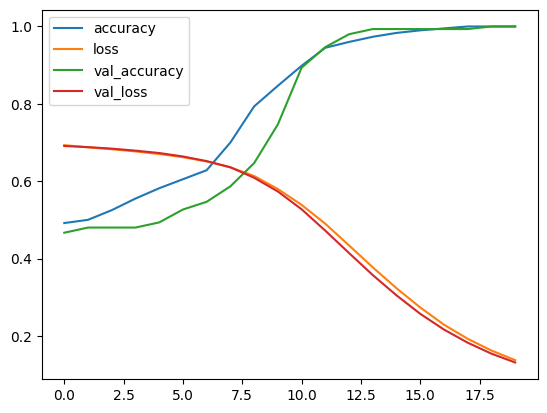

In [22]:
# visualize the loss history
pd.DataFrame(history.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classificaion


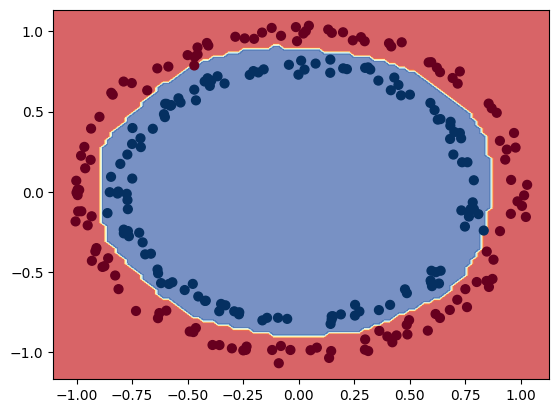

In [23]:
plot_decision_boundary(model=model,X=X_test,y=y_test)

In [ ]:
# the model looks good now